## Exercise with perceptron
Find the optimal weights for the two [dimensional dataset](data/rodents.csv) to seperate mice from rats based on data about height and weight. This is a superviced dataset with labels that can be found in the data folder (in this repo)
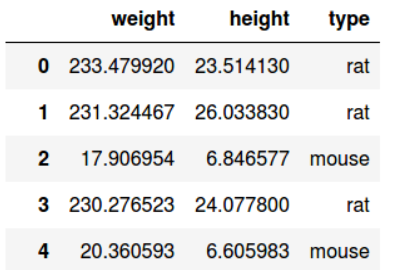

### Part one: general
1. Look at the activation_function and plot the y-values for each x from -5,5 spaced with 0.5 
2. Change the perceptron method from the notebook to use the [numpy.dot() method](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) in line 12 instead of the lengthy sum() function

### Part two: rodent data
1. Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice
2. Manually find the optimal linear function to divide the 2 groups (y = aX+b). Plot it on the scatter plot
3. What is the slope and intercept of the linear function?
4. Now change the 'type' column to represent rats as 1 and mice as -1
5. Clean up any rows with null data
6. Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats: 
```
[[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]
```
7. Find the (approximately) optimal weights using the perceptron learning algorithm
8. Plot the weightline
9. Plot the division line

In [1]:
import pandas as pd

data_frame = pd.read_csv("../../data/rodents.csv", delimiter=";", decimal=".")

data_frame

,weight,height,type
0,233.479920,23.514130,rat
1,231.324467,26.033830,rat
2,17.906954,6.846577,mouse
3,230.276523,24.077800,rat
4,20.360593,6.605983,mouse
...,...,...,...
245,22.249846,6.951267,mouse
246,228.568162,27.146987,rat
247,229.002922,23.526073,rat
248,232.249811,24.579833,NaN


### Part one: general

1. Look at the activation_function and plot the y-values for each x from -5,5 spaced with 0.5 

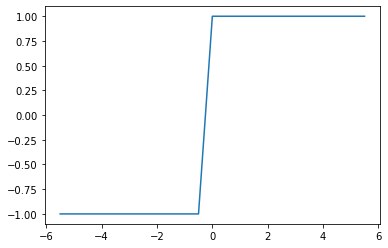

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1
    
num_step = (int)((5.5-(-5.5)) / 0.5) + 1

the_range = np.linspace(-5.5, 5.5, num=num_step)

values = [activation_function(i) for i in the_range]

plt.plot(the_range, values)

2. Change the perceptron method from the notebook to use the [numpy.dot() method](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) in line 12 instead of the lengthy sum() function

In [3]:
def perceptron(inp, weights):
    """
    Given a list of feature (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    dot_product = 0;
    for i, w in zip(inp, weights):
        dot_product += np.dot(i,w)
    output = activation_function(dot_product)
    return output

perceptron([1, 2, 3, 4, 5], [1, 1, 2, 1, 1])

1

### Part two: rodent data

1. Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice

In [22]:
from itertools import cycle

unique = np.unique(data_frame['type'])

colours = cycle('bgrcmy')
for k, col in zip(unique, colours):
    filter_data = (data['type'] == k)
    plt.scatter(data['weight'][filter_data], data['height'][filter_data], color=col)

TypeError: '<' not supported between instances of 'float' and 'str'